<a href="https://colab.research.google.com/github/prasadsawant7/ML_Algorithms/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [141]:
df = pd.read_csv('Mall_Customers.csv')
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [142]:
df.shape

(200, 5)

In [143]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


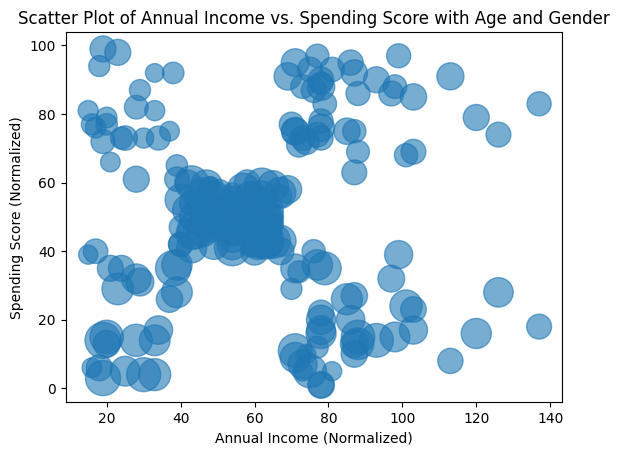

In [144]:
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']
age = df['Age']
gender = df['Gender']

plt.scatter(x, y, s=age*10, alpha=0.6)
plt.xlabel('Annual Income (Normalized)')
plt.ylabel('Spending Score (Normalized)')
plt.title('Scatter Plot of Annual Income vs. Spending Score with Age and Gender')

plt.show()

In [145]:
km = KMeans(n_clusters=3)
km.n_init = 10
y_predicted = km.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [146]:
df['cluster'] = y_predicted
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,2
3,4,1,23,16,77,2
4,5,1,31,17,40,2
...,...,...,...,...,...,...
195,196,1,35,120,79,1
196,197,1,45,126,28,0
197,198,0,32,126,74,1
198,199,0,32,137,18,0


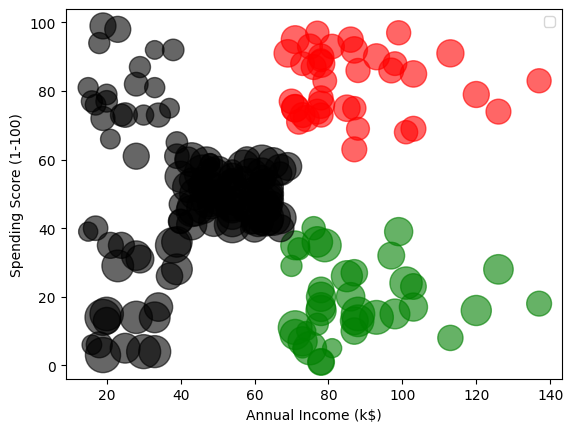

In [147]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green', s=df1['Age']*10, alpha=0.6)
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red', s=df2['Age']*10, alpha=0.6)
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='black', s=df3['Age']*10, alpha=0.6)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [148]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,0.019231,0.000000,0.387755,2
1,2,0,0.057692,0.000000,0.816327,2
2,3,1,0.038462,0.008197,0.051020,2
3,4,1,0.096154,0.008197,0.775510,2
4,5,1,0.250000,0.016393,0.397959,2
...,...,...,...,...,...,...
195,196,1,0.326923,0.860656,0.795918,1
196,197,1,0.519231,0.909836,0.275510,0
197,198,0,0.269231,0.909836,0.744898,1
198,199,0,0.269231,1.000000,0.173469,0


In [149]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.n_init = 10
  km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  sse.append(km.inertia_)

In [150]:
sse

[23.04072032603991,
 13.993505283127973,
 9.058985215159453,
 6.110312266413656,
 3.5831179059525606,
 3.1003435707513756,
 2.6312732089601267,
 2.219102396924736,
 1.8774309964157636]

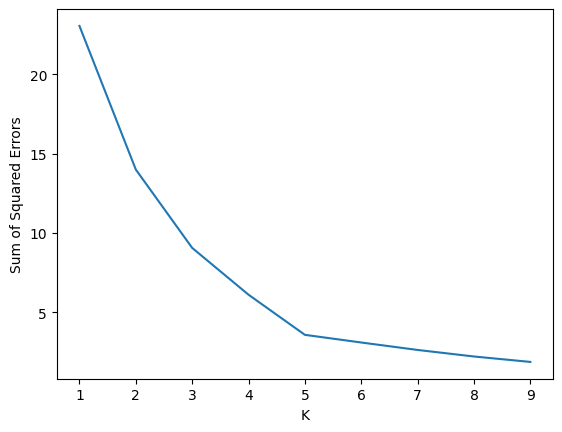

In [151]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng, sse)

In [152]:
km = KMeans(n_clusters=5)
km.n_init = 10
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
y_predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [153]:
df['cluster'] = y_predicted
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,0.019231,0.000000,0.387755,4
1,2,0,0.057692,0.000000,0.816327,3
2,3,1,0.038462,0.008197,0.051020,4
3,4,1,0.096154,0.008197,0.775510,3
4,5,1,0.250000,0.016393,0.397959,4
...,...,...,...,...,...,...
195,196,1,0.326923,0.860656,0.795918,2
196,197,1,0.519231,0.909836,0.275510,0
197,198,0,0.269231,0.909836,0.744898,2
198,199,0,0.269231,1.000000,0.173469,0


In [154]:
km.cluster_centers_

array([[0.6       , 0.16443149],
       [0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432]])

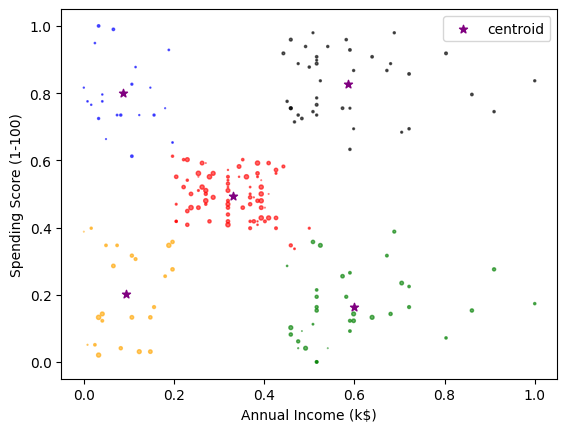

In [155]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green', s=df1['Age']*10, alpha=0.6)
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red', s=df2['Age']*10, alpha=0.6)
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='black', s=df3['Age']*10, alpha=0.6)
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='blue', s=df4['Age']*10, alpha=0.6)
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='orange', s=df5['Age']*10, alpha=0.6)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

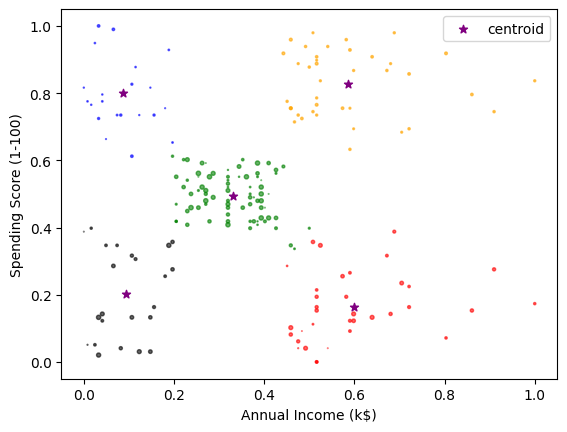

In [161]:
# Random Initialization

np.random.seed(42)

km = KMeans(n_clusters=5, random_state=42)
km.n_init = 10
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

df['cluster'] = y_predicted

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green', s=df1['Age']*10, alpha=0.6)
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red', s=df2['Age']*10, alpha=0.6)
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='black', s=df3['Age']*10, alpha=0.6)
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='blue', s=df4['Age']*10, alpha=0.6)
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='orange', s=df5['Age']*10, alpha=0.6)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

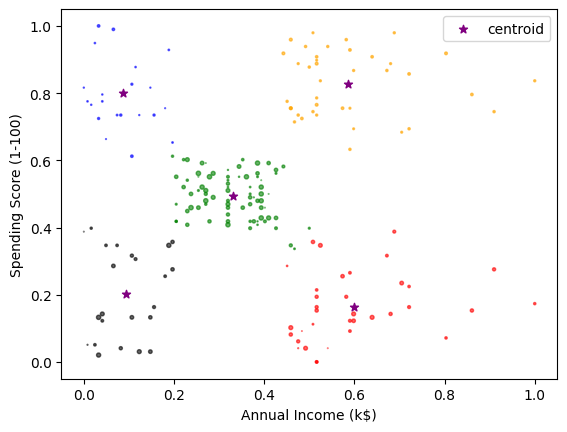

In [164]:
# KMeans++

np.random.seed(42)

km = KMeans(n_clusters=5, init='k-means++', random_state=42)
km.n_init = 10
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

df['cluster'] = y_predicted

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green', s=df1['Age']*10, alpha=0.6)
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red', s=df2['Age']*10, alpha=0.6)
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='black', s=df3['Age']*10, alpha=0.6)
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='blue', s=df4['Age']*10, alpha=0.6)
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='orange', s=df5['Age']*10, alpha=0.6)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()